In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 


import matplotlib.pyplot as plt
import numpy as np



In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

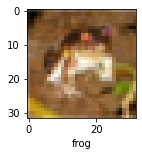

In [ ]:
plot_sample(X_train, y_train, 0)

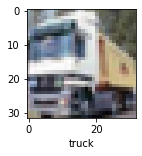

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6031 - accuracy: 0.7866
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5738 - accuracy: 0.7990
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5421 - accuracy: 0.8075
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5147 - accuracy: 0.8179
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4882 - accuracy: 0.8285
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4602 - accuracy: 0.8382
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4360 - accuracy: 0.8462
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4173 - accuracy: 0.8522
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3942 - accuracy: 0.8596
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.374

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9103 - accuracy: 0.6977


[0.910329282283783, 0.697700023651123]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.5831001e-04, 5.2604937e-05, 7.8775790e-03, 7.1959227e-01,
        6.3629006e-04, 2.0502815e-01, 5.9560150e-02, 5.4191576e-05,
        6.5684593e-03, 7.2051509e-05],
       [2.0073973e-02, 1.1854781e-01, 3.1484047e-05, 1.1143865e-06,
        8.4834952e-08, 3.9900371e-08, 6.1769903e-08, 9.1186116e-08,
        8.6099422e-01, 3.5117118e-04],
       [6.2616163e-01, 1.7580591e-01, 8.8077541e-03, 3.2358484e-03,
        3.9990441e-04, 1.5052051e-04, 9.3039416e-05, 1.3228192e-03,
        1.7402211e-01, 1.0000406e-02],
       [9.9018717e-01, 6.2288824e-03, 2.4996260e-03, 1.6875869e-04,
        1.1325289e-04, 1.3643745e-06, 2.2595659e-06, 2.1540593e-05,
        4.8269186e-04, 2.9453181e-04],
       [2.2491689e-07, 6.6686234e-06, 4.3927813e-03, 5.0764931e-03,
        3.9758381e-02, 3.3378403e-04, 9.5037270e-01, 4.6846832e-08,
        5.8564052e-05, 3.3283672e-07]], dtype=float32)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

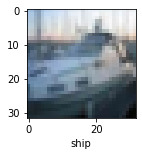

In [ ]:
plot_sample(X_test, y_test,2)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [ ]:
classes[y_classes[2]]


'airplane'

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.80      0.71      1000
           1       0.78      0.84      0.81      1000
           2       0.56      0.62      0.59      1000
           3       0.60      0.43      0.50      1000
           4       0.67      0.64      0.66      1000
           5       0.63      0.61      0.62      1000
           6       0.74      0.82      0.78      1000
           7       0.73      0.74      0.74      1000
           8       0.86      0.71      0.78      1000
           9       0.79      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

